In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "16"

In [2]:
import healpy as hp
import numpy as np

https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Map-making#HFI_2018_Solar_dipole

HFI solar dipole 2018

v = (369.8150 ± 0.0010) km s-1

A = (3362.08 ± 0.09 (stat.) ± 0.45 (syst.) ± 0.32 (cal.) μK

l = (264.021 ± 0.003 (stat.) ± 0.0079 (syst.) )°

b = (48.253 ± 0.001 (stat.) ± 0.0037 (syst.) )°



In [3]:
ref_frame = "equatorial"
target_frame = "C" if ref_frame == "equatorial" else "G"

In [4]:
nside = 2048
npix = hp.nside2npix(nside)

In [5]:
dip_lon = 264.021
dip_lat = 48.253

In [6]:
import pysm3.units as u
from astropy.constants import c

In [7]:
c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [8]:
T_CMB = 2.72548  * u.K_CMB
vel = 369815 * (u.m/u.s)
beta = vel / c
gamma=1/np.sqrt(1-beta**2)
cosdir = 1
T_dipole_CMB = T_CMB / (gamma * ( 1 - beta * cosdir ))
solar_dipole_amplitude = T_dipole_CMB - T_CMB

In [9]:
solar_dipole_amplitude.to(u.mK_CMB)

<Quantity 3.36414676 mK_CMB>

In [10]:
gal2eq = hp.Rotator(coord="G" + target_frame)

In [11]:
solar_dipole_vec_gal = gal2eq(hp.ang2vec(dip_lon, dip_lat, lonlat=True))

In [12]:
solar_dipole_vec_gal

array([-0.97076239,  0.20737082, -0.12090375])

In [13]:
vec = np.array(hp.pix2vec(nside, np.arange(npix)))

In [14]:
vec.shape

(3, 50331648)

In [15]:
cosdir = np.dot(solar_dipole_vec_gal, vec)

In [16]:
solar_dipole_map = T_CMB / (gamma * ( 1 - beta * cosdir )) - T_CMB

In [17]:
cosdir.max()

0.9999999780811585

In [18]:
%matplotlib inline

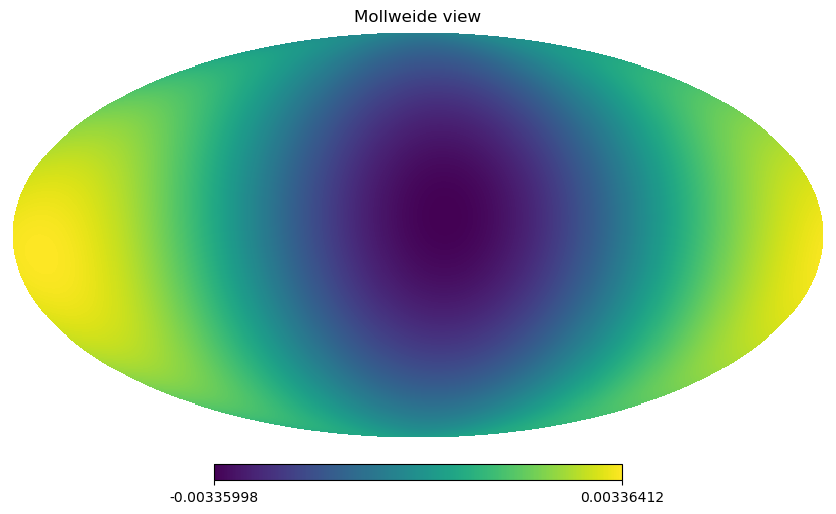

In [19]:
hp.mollview(solar_dipole_map)

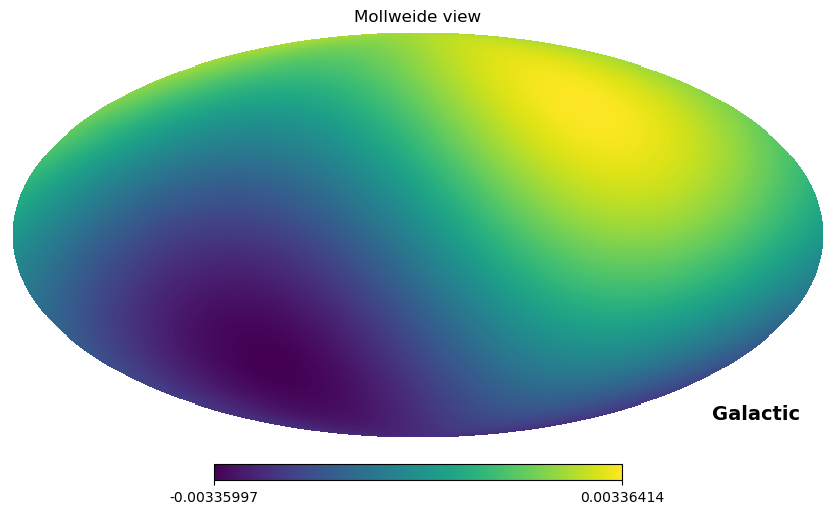

In [20]:
hp.mollview(solar_dipole_map, coord=target_frame+"G")

In [21]:
solar_dipole_map

<Quantity [-0.00040922, -0.00040738, -0.00040778, ...,  0.00040559,
            0.0004052 ,  0.00040336] K_CMB>

In [22]:
unit = "uK_CMB"

In [23]:
!mkdir -p ../output/$ref_frame/dipole/

In [24]:
hp.write_map(
    f"../output/dipole/cmb_solar_dipole_uKCMB_nside{nside}.fits",
    hp.reorder(solar_dipole_map.to_value(unit), r2n=True),
    coord=target_frame,
    column_units=unit,
    dtype=np.float32,
    overwrite=True,
    nest=True,
)